In [386]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pathlib import Path
from functools import reduce

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [387]:
path = Path('./corona_data_sets') # use your path
all_files = list(path.rglob("*.csv"))

In [388]:
d = {}

for p in all_files:
    df = pd.read_csv(p, index_col=None, header=0, converters={'ags2': str, 'ags5': str})
    df = df.drop(['bundesland', 'kreis', '_id'], 1)
    d[p.stem] = df

In [389]:
d.keys()

dict_keys(['private_finanzen', 'verkehr', 'bevoelkerung', 'oeffentliche_finanzen', 'tourismus', 'pendler', 'krankenhausdaten', 'arbeitsmarktentwicklung', 'firmeninformationen', 'haushalte', 'erreichbarkeit', 'raumordnung', 'point_of_interest', 'genesene', 'ausbildungssituation', 'flaechennutzung', 'volkswirtschaftliche_gesamtrechnung', 'firmenveraenderungen'])

In [390]:
company_changes = d["firmenveraenderungen"]
filter_col = [col for col in company_changes if col.startswith('d20')]
company_changes["value"] = company_changes[filter_col].mean(axis=1)
company_changes = company_changes.drop(filter_col, 1)
company_changes = company_changes.loc[company_changes['variable'] == 'kr_firm_loesch_m']
company_changes = company_changes.drop(['variable'], 1)
company_changes = company_changes[:-1]
d["firmenveraenderungen"] = company_changes

In [391]:
d.pop("genesene")

,ags2,ags5,variable,d20200301,d20200302,d20200303,d20200304,d20200305,d20200306,d20200307,...,d20210605,d20210606,d20210607,d20210608,d20210609,d20210610,d20210611,d20210612,d20210613,d20210614
0,01,01001,kr_gen_md,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,01,01002,kr_gen_md,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,01,01003,kr_gen_md,0,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0,0
3,01,01004,kr_gen_md,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,01,01051,kr_gen_md,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,16,16073,kr_gen_md_kum,0,0,0,0,0,0,0,...,6451,6451,6451,6451,6451,6452,6452,6452,6452,6452
798,16,16074,kr_gen_md_kum,0,0,0,0,0,0,0,...,4582,4582,4582,4582,4582,4582,4582,4582,4582,4582
799,16,16075,kr_gen_md_kum,0,1,1,1,1,1,1,...,6232,6232,6232,6233,6233,6233,6233,6233,6233,6233
800,16,16076,kr_gen_md_kum,0,0,0,0,0,0,0,...,7503,7503,7503,7503,7503,7503,7503,7503,7503,7503


In [392]:
{k: len(set(v["ags2"])) for k, v in d.items()}

{'private_finanzen': 16,
 'verkehr': 16,
 'bevoelkerung': 16,
 'oeffentliche_finanzen': 16,
 'tourismus': 16,
 'pendler': 16,
 'krankenhausdaten': 16,
 'arbeitsmarktentwicklung': 16,
 'firmeninformationen': 16,
 'haushalte': 16,
 'erreichbarkeit': 16,
 'raumordnung': 16,
 'point_of_interest': 16,
 'ausbildungssituation': 16,
 'flaechennutzung': 16,
 'volkswirtschaftliche_gesamtrechnung': 16,
 'firmenveraenderungen': 16}

In [393]:
{k: len(set(v["ags5"])) for k, v in d.items()}

{'private_finanzen': 401,
 'verkehr': 401,
 'bevoelkerung': 401,
 'oeffentliche_finanzen': 401,
 'tourismus': 401,
 'pendler': 401,
 'krankenhausdaten': 401,
 'arbeitsmarktentwicklung': 401,
 'firmeninformationen': 401,
 'haushalte': 401,
 'erreichbarkeit': 401,
 'raumordnung': 401,
 'point_of_interest': 401,
 'ausbildungssituation': 401,
 'flaechennutzung': 401,
 'volkswirtschaftliche_gesamtrechnung': 401,
 'firmenveraenderungen': 401}

In [394]:
# list(zip([v["ags5"] for k, v in d.items()]))
d['volkswirtschaftliche_gesamtrechnung']

,id,ags2,ags5,kr_bip_ew,kr_bip_et,kr_bws,kr_bws_bd,kr_bws_ld,kr_bws_ps_ant,kr_bws_sk_ant,kr_bws_ts_ant,kr_bws_ps_et,kr_bws_ss_et,kr_bws_ts_et
0,1,01,01001,42.5,62.7,56.5,1.1,4.0,0.0,20.6,79.4,17.5,88.0,51.7
1,2,01,01002,47.0,67.1,60.5,3.6,12.5,0.0,16.9,83.1,19.6,86.3,57.1
2,3,01,01003,40.6,68.4,61.6,2.7,9.4,0.1,23.8,76.1,35.8,79.0,57.8
3,4,01,01004,40.6,62.2,56.1,1.0,3.4,0.5,23.4,76.1,33.7,72.5,52.7
4,5,01,01051,32.9,72.3,65.1,1.3,4.7,4.3,38.5,57.2,48.7,115.9,51.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,397,16,16073,26.9,60.1,54.1,0.9,4.7,1.3,40.0,58.7,35.4,62.7,50.1
397,398,16,16074,23.2,55.5,50.1,0.6,3.1,2.3,36.5,61.2,27.4,51.6,50.7
398,399,16,16075,28.5,59.2,53.4,0.7,3.7,3.6,45.5,50.9,42.3,57.2,51.3
399,400,16,16076,23.6,58.8,53.0,0.7,3.8,2.7,39.2,58.1,46.6,56.5,51.2


In [395]:
dataFrames = [v for v in d.values()]
df_final = pd.concat(dataFrames, axis=1, keys=['ags5'], join='inner')['ags5']
df_final.set_index('ags5', inplace=True, drop=True)
df_final

,ags2,kr_ein_md,kr_schu_qu,kr_hh_eink_kl1,kr_hh_eink_kl2,kr_hh_eink_kl3,kr_hh_eink_kl4,kr_hh_eink_kl5,kr_hh_eink_kl6,kr_kk_hh,kr_kk_ew
ags5,,,,,,,,,,,
01001,01,2986,16.0,13209,12385,13092,5441,3096,3497,34496,19556
01002,01,3304,12.1,22126,38523,39483,18567,11162,7841,35246,19612
01003,01,3036,15.1,22881,30159,32571,15805,10999,9039,37219,20820
01004,01,2842,17.9,7208,13291,10435,3812,3201,2805,38141,19561
01051,01,2914,12.8,11806,11575,17816,9873,7834,7676,46945,23486
...,...,...,...,...,...,...,...,...,...,...,...
16073,16,2466,8.3,12237,13267,19810,5653,3271,2547,39242,20959
16074,16,2288,7.6,5131,9216,14445,5254,3446,2379,42956,20631
16075,16,2253,7.6,7388,7994,17082,4532,2501,1632,40511,20610


In [396]:
df_final

,ags2,kr_ein_md,kr_schu_qu,kr_hh_eink_kl1,kr_hh_eink_kl2,kr_hh_eink_kl3,kr_hh_eink_kl4,kr_hh_eink_kl5,kr_hh_eink_kl6,kr_kk_hh,kr_kk_ew
ags5,,,,,,,,,,,
01001,01,2986,16.0,13209,12385,13092,5441,3096,3497,34496,19556
01002,01,3304,12.1,22126,38523,39483,18567,11162,7841,35246,19612
01003,01,3036,15.1,22881,30159,32571,15805,10999,9039,37219,20820
01004,01,2842,17.9,7208,13291,10435,3812,3201,2805,38141,19561
01051,01,2914,12.8,11806,11575,17816,9873,7834,7676,46945,23486
...,...,...,...,...,...,...,...,...,...,...,...
16073,16,2466,8.3,12237,13267,19810,5653,3271,2547,39242,20959
16074,16,2288,7.6,5131,9216,14445,5254,3446,2379,42956,20631
16075,16,2253,7.6,7388,7994,17082,4532,2501,1632,40511,20610


In [397]:
df = df_final
#X = df.drop(["ags5"], 1)
pca = PCA(n_components=3)

In [398]:
pca.fit(X)

PCA(n_components=3)

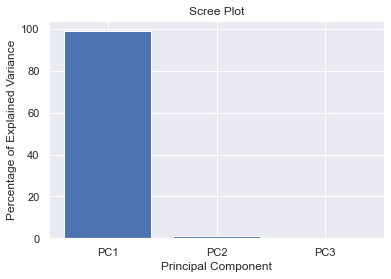

In [399]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

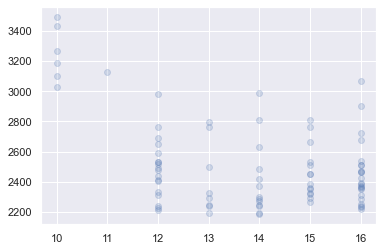

In [400]:
# plot data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.2)

(401, 11)
(401, 3)


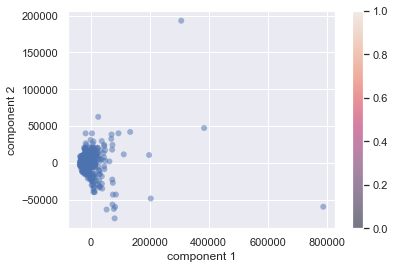

In [401]:
 projected = pca.fit_transform(df)
print(df.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
             edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [402]:
principalComponents = pca.fit_transform(X)
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2
0,-7.108149e+05,-495853.662778,-183844.352525
1,-8.936839e+05,63953.509891,31747.657898
2,-1.282334e+06,-82911.476960,-55522.588531
3,-1.196168e+06,-202989.931305,-114249.345939
4,-1.101653e+06,-78854.410491,-58567.632941
...,...,...,...
78,-1.067244e+06,-5183.394596,29797.505137
79,-1.188460e+06,28178.713736,31162.869493
80,-1.207097e+06,18872.619221,35860.975803
81,-1.386122e+06,-60380.016879,17870.494608


In [403]:
print(pd.DataFrame(pca.components_,columns=df.columns,index = ['PC-1','PC-2','PC-3']))

ValueError: Shape of passed values is (3, 568), indices imply (3, 11)

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
km = KMeans(n_clusters=3).fit(df)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = km.labels_

In [ ]:
cluster_map